# Визуализация

### Морфология, часть вторая

Токенизация и морфологический разбор -- nltk и pymorphy2

In [1]:
with open('cinics.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
%%time

from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
print(tokens[0:100])

['Анатолий', 'Мариенгоф', '.', 'Циники', 'роман', 'Почему', 'может', 'быть', 'признан', 'виновным', 'историк', ',', 'верно', 'следующий', 'мельчайшим', 'подробностям', 'рассказа', ',', 'находящегося', 'в', 'его', 'распоряжении', '?', 'Его', 'ли', 'вина', ',', 'если', 'действующие', 'лица', ',', 'соблазненные', 'страстями', ',', 'которых', 'он', 'не', 'разделяет', ',', 'к', 'несчастью', 'для', 'него', 'совершают', 'действия', 'глубоко', 'безнравственные', '.', 'Стендаль', 'Вы', 'очень', 'наблюдательны', ',', 'Глафира', 'Васильевна', '.', 'Это', 'все', 'очень', 'верно', ',', 'но', 'не', 'сами', 'ли', 'вы', 'говорили', ',', 'что', ',', 'чтобы', 'угодить', 'на', 'общий', 'вкус', ',', 'надо', 'себя', '``', 'безобразить', "''", '.', 'Согласитесь', ',', 'это', 'очень', 'большая', 'жертва', ',', 'для', 'которой', 'нужно', 'своего', 'рода', 'геройство', '.', 'Лесков', '%', '*', '1918']
Wall time: 2.07 s


In [4]:
%%time
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

result = []

for token in tokens:
    t_word = {}
    words = morph.parse(token)
    t_word['word'] = words[0][0]
    t_word['normal_form'] = words[0][2]
    t_word['score'] = words[0][3]
    t_word['POS'] = words[0].tag.POS
    t_word['animacy'] = words[0].tag.animacy
    t_word['aspect'] = words[0].tag.aspect
    t_word['case'] = words[0].tag.case
    t_word['gender'] = words[0].tag.gender
    t_word['involvement'] = words[0].tag.involvement
    t_word['mood'] = words[0].tag.mood
    t_word['number'] = words[0].tag.number
    t_word['person'] = words[0].tag.person
    t_word['tense'] = words[0].tag.tense
    t_word['transitivity'] = words[0].tag.transitivity
    t_word['voice'] = words[0].tag.voice
    result.append(t_word)


Wall time: 27 s


Таблица в Pandas:

In [5]:
import pandas as pd

df = pd.DataFrame(result)

df

,word,normal_form,score,POS,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,анатолий,анатолий,0.947368,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
1,мариенгоф,мариенгоф,0.333333,NOUN,inan,None,nomn,masc,None,None,sing,None,None,None,None
2,.,.,1.000000,None,None,None,None,None,None,None,None,None,None,None,None
3,циники,циник,1.000000,NOUN,anim,None,nomn,masc,None,None,plur,None,None,None,None
4,роман,роман,0.083333,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28369,ничего,ничто,0.600000,NPRO,None,None,gent,neut,None,None,sing,None,None,None,None
28370,и,и,0.997671,CONJ,None,None,None,None,None,None,None,None,None,None,None
28371,не,не,1.000000,PRCL,None,None,None,None,None,None,None,None,None,None,None
28372,случилось,случиться,1.000000,VERB,None,perf,None,neut,None,indc,sing,None,past,intr,None


In [6]:
import matplotlib.pyplot as plt
df['POS'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Распределение частей речи')
plt.xlabel('part of speech')
plt.ylabel('number of entries');

Соотношение разных частей речи в тексте можно сравнить с их соотношением для корпуса в целом и для корпуса дневников

### Облака слов

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой', 'на'])
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

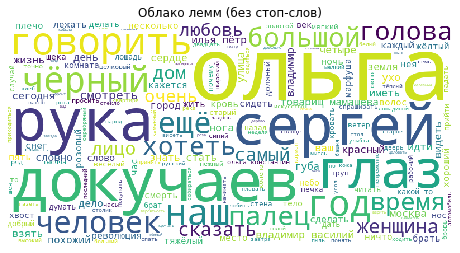

In [14]:
import matplotlib.pyplot as plt

text_cloud = ' '.join(w for w in df['normal_form'].values if w not in stops)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 400, 
).generate(text_cloud)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако лемм (без стоп-слов)')
plt.show()

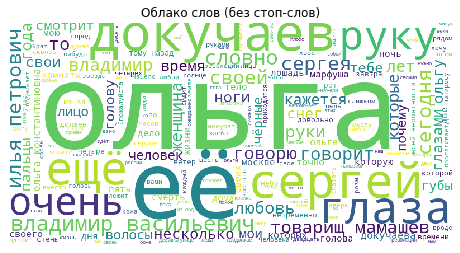

In [10]:
import matplotlib.pyplot as plt

text_cloud = ' '.join(w for w in df['word'].values if w not in stops)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 400, 
).generate(text_cloud)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (без стоп-слов)')
plt.show()

### Dispersion

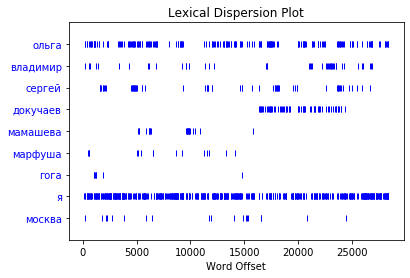

In [112]:
from nltk.draw import dispersion_plot

dispersion_plot(df['normal_form'], ['ольга', 'владимир','сергей', 'докучаев', 
                                    'мамашева', 'марфуша', 'гога', 'я', 'москва'])

В этом романе повествование ведётся от первого лица, повествующего героя зовут Владимиром, и обращается к нему по имени чаще всего Ольга. "Я" в большинстве случаев -- почти наверняка о нём же. "Ольга" встречается и в обращениях Владимира, и в собственно повествовании. Сергей появляется эпизодами, Докучаев --  олько в одном участке повествования. Марфуша ишрает некоторую роль в начале повнествования, но редко проявляется в конце. Гога также появдяется в двух-трёх эпизодах. Всё действие происходит в Москве, и её образ для романа значим.

### Длина частей

Роман разделён на четыре больших части по годам -- 1918, 1919, 1922 и 1924. Внутри каждого из этих годов встречаются и длинные, и совсем короткие -- в несколько слов. Далее показано распределение этих частей по количеству знаков в них

In [15]:
text_first = text.split(' % * ')
not_splitted_parts = {}
for text_years in text_first:
    first = text_years.split('* %')
    if len(first) > 1:
        not_splitted_parts[first[0]] = first[1]

In [16]:
all_d = {}
for year, part_year in not_splitted_parts.items():
    list_of_parts = {}
    parts_parts = part_year.split('\n\n %')
    for part in parts_parts:
        if part:
            part_d = part.split('%\n')
            list_of_parts[int(part_d[0])] = part_d[1].strip(' \n')
    all_d[year] = list_of_parts

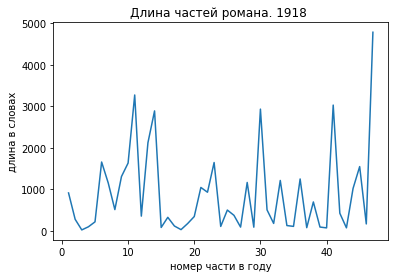

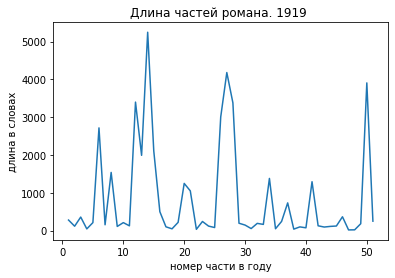

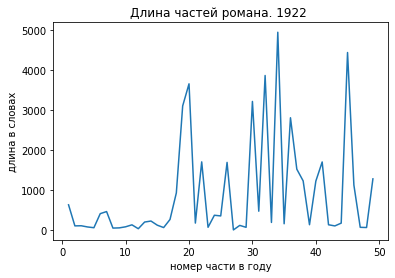

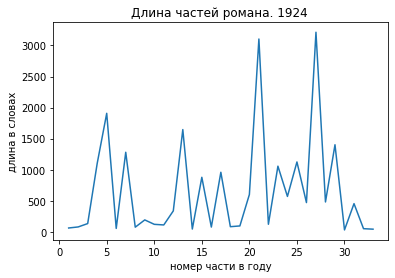

In [17]:
for year, year_data in all_d.items():
    X = []
    Y = []
    for number, part in year_data.items():
        X.append(number)
        Y.append(len(part))

    plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
    plt.title('Длина частей романа. ' + year) # заголовок
    plt.ylabel('длина в словах') # подпись оси Х
    plt.xlabel('номер части в году') # подпись оси Y
    plt.show()